In [6]:
from tetra_analysis.sigma_plot.plot_sigma5 import *

In [7]:
n, a = get_sig(['LSU_01','LSU_02'],'2017_06_24','entln')

SystemExit: 

In [8]:
%tb

SystemExit: 

In [7]:
n1, a1 = get_sig(['PAN_01','PAN_02','PAN_03','PAN_04','PAN_05'],'2017_08_10', 'entln')

33.743999958
145.951999903
147.873999834


In [4]:
n2, a2 = get_sig(['PR_01','PR_02','PR_03','PR_04','PR_05','PR_06','PR_07','PR_08','PR_09','PR_10'],'2017_08_13','entln')

104.131999969
198.661000013
200.623999834


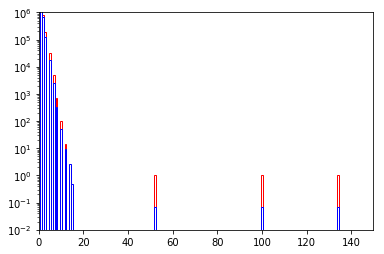

In [3]:
x0 = np.arange(len(n))+1
plt.yscale('log')
#plt.plot(near_bin, lw = .5, marker = 'o', color = 'r')
plt.bar(x0,n, color = 'white', edgecolor = 'r')
plt.bar(x0,a, color = 'white', edgecolor = 'b')
#plt.plot(a, lw = 0, marker = 'o', color = 'y')
plt.xlim([0,150])
plt.ylim([0.01,1e6])
plt.show()

In [ ]:
#check on how get_sig handles large sigma points in all data when normalized
#does it just go to zero, or a small decimal that could show up in the plot?  FIXED!

In [5]:
#this cell used for testing get_sig process of obtaining the histogrammed data

from datetime import date
import tetra_tools.tools as tool
import time
from tetra_analysis.ec_search.lightning import nearby

source = 'entln'
bin_size = .002
box_num = ['LSU_01','LSU_02']
start_date = '2017_03_25'
start_time = time.time()  
d = date_str[8:10]
m = date_str[5:7]
y = date_str[0:4]
    
near_data = []
loc = tool.loc_name(box_num[0])
strikes_8km = nearby(loc, date_str, source)
if len(strikes_8km[0]) == 0: sys.exit()
timestamps = np.array([])
for b in box_num:
    fp = 'Y:/' + b + '/' + y + '_' + m + '/ts_' + d + '.npz'
    if not os.path.exists(fp): continue
    ts_file = np.load(fp)
    for key in ts_file.keys():
        timestamps = np.concatenate([timestamps, ts_file[key]])
if bin_size < .1:
    all_counts = np.array([])
    all_bins = np.array([])
    for i in range(24):
        ts_1hr = timestamps[np.where(np.logical_and(timestamps < 3600 * (i+1), timestamps > 3600 * i))[0]]
        bins = np.linspace(0, 3600, 3600/bin_size + 1) + 3600 * i
        counts = np.histogram(ts_1hr, bins)[0]
        all_counts = np.concatenate([all_counts, counts])
        if i != 23:
            all_bins = np.concatenate([all_bins, bins[:-1]])
        else:
            all_bins = np.concatenate([all_bins, bins[:]])
else:
    all_bins = np.linspace(0, 86400, (86400/bin_size) + 1)
    all_counts = np.histogram(timestamps, all_bins)[0]
bin_mid = all_bins[:-1] + bin_size/2

In [6]:
#this cell is used for testing comparing binned data with lightning strikes


near_data = []
for i in range(len(bin_mid) - 1):
    try:
        x = tool.get_nearest(strikes_8km[0], bin_mid[i])
    except ValueError:
        continue
    if np.abs(bin_mid[i] - strikes_8km[0][x]) < 5:
        near_data.append(all_counts[i])
ave_counts = np.average(all_counts)
sig_counts = np.std(all_counts)

In [7]:
#this cell used for testing binning far/near data

def bin_data(data, ave_counts, sig_counts):
    """take in a set of histogrammed data its average and stddev
    return the bin counts for each sigma level
    """
    
    above = data - ave_counts
    above[above < 0] = 0
    sig = above / sig_counts
    sig = np.floor(sig).astype(np.int32)
    sig = sig[sig >= 0]
    bins = np.bincount(sig)
    return bins

near_bin = bin_data(near_data, ave_counts, sig_counts)
all_bin = bin_data(all_counts, ave_counts, sig_counts)
all_bin = all_bin * float(len(near_data))/float(len(all_counts))
storm_time_hrs = round(len(near_data)*.002/3600,5)
print len(all_bin)
print len(near_bin)

134
134


In [13]:
test2 = np.array(list(zip(near_bin, all_bin)))
test2[-1]

array([ 1.        ,  0.07100123])

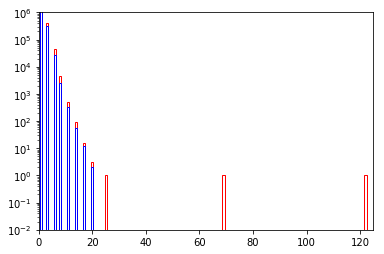

In [20]:
#this cell used for playing with plotting

#plt.plot(f, lw = 0, marker = 'o', color = 'r')
plt.yscale('log')
#plt.plot(near_bin, lw = .5, marker = 'o', color = 'r')
plt.bar(x1,near_bin, color = 'white', edgecolor = 'r')
plt.bar(x3,all_bin, color = 'white', edgecolor = 'b')
#plt.plot(a, lw = 0, marker = 'o', color = 'y')
plt.xlim([0,125])
plt.ylim([0.01,1e6])
plt.show()

In [42]:
test2[0][0]

2601029.0

In [9]:
source = 'entln'

In [11]:
source[0]

'e'